#### Name:
#### Reg No.:

# First Individual Project Assignment:-

You are a lead data scientist on a project regarding maternal health, you are provided with a dataset regarding featal health. (Please find the dataset in the data folder given). These are your instructions
1 - Use that dataset to do: EDA, Clean the data
2 - Use mandas Profiling to export a pdf report of your data (explain how the report informs your future decisions)
3 - Apply any needed transformations if possible.
4 - Choose a proper evaluation metric for your project.
5 - Do model spot checking to find the best model for your use.
6 - Build the chosen model
7 - Evaluate bias vs variance on your model and present your results.

Note:
- Please follow instructions!
- You have to explain in detail every step you are executing in your own words, your result will be based on how well you explain what steps you are executing.
- Students are allowed to use public resources off the internet for their research, however students are not allowed to copy and paste code for this assignment (If you are caught, you will fail this assignment, you have been warned: especially chatGpt.)
- This is a graded individual assignment any malpractice will lead to losing of points, this assignment contributes a great percentage to your final grade.
- All assignments must be handed in by Close of Business next Wednesday by 6:00PM Date: 3rd - May - 2023
- All your assignments will be handed in by means of a pull request to my original repository.
- Please name your pull requests as per previously instructed, you will not get warnings for failing to do this.
- Your work should be saved in the Project Folder (Create your own folder and give the folder your name.)


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Task 1

#### Reading the Data

In [2]:
# Loading the fetal health data
fh_data = pd.read_csv(r"..\..\Data\Featal Health Classification\fetal_health.csv")

#### Exploratory Data Analysis (EDA)

In [3]:
# Checking the shape of the data
fh_data.shape

(2126, 22)

In [4]:
# Displaying the first five rows of the data
fh_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
# Checking for number presence of null values and dtypes
fh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
# Displaying the data's descriptive statistics
fh_data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [7]:
# Checking for duplicates
fh_data[fh_data.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


#### Univariate Analysis

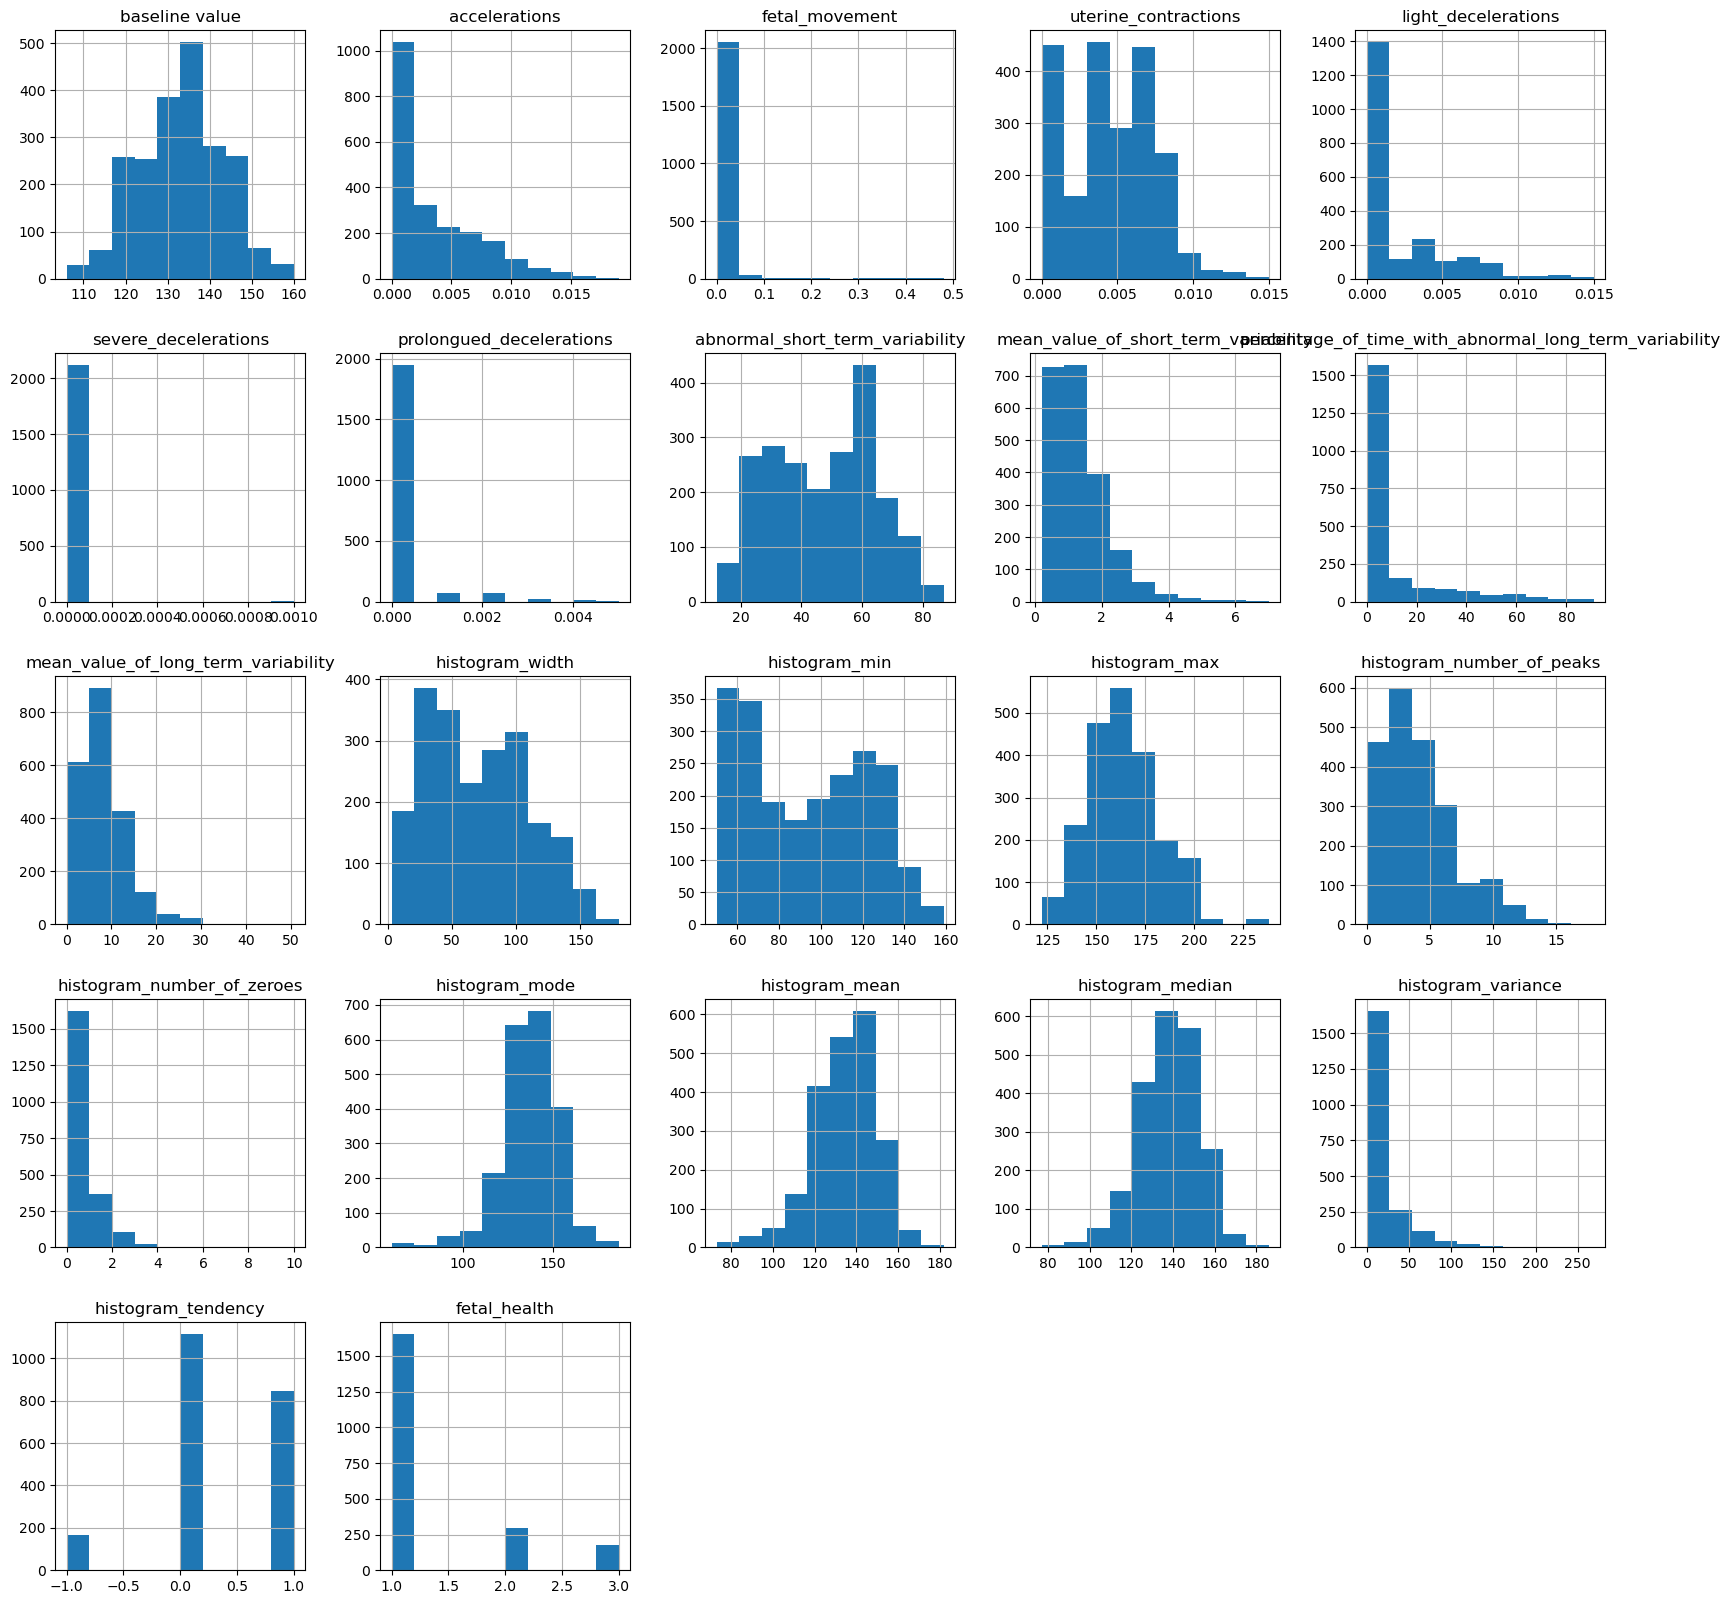

In [8]:
# Plotting the distribution of the fetal health data
fh_data.hist(figsize=(20,20));

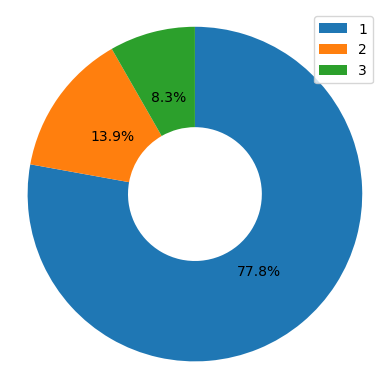

In [9]:
# Proportion of fetal health classes
plt.pie(fh_data['fetal_health'].value_counts(), startangle = 90, counterclock = False, autopct='%1.1f%%', wedgeprops = {'width' : 0.6});
plt.axis('square')
plt.legend(['1','2','3']);

#### Bivariate Analysis

<AxesSubplot:>

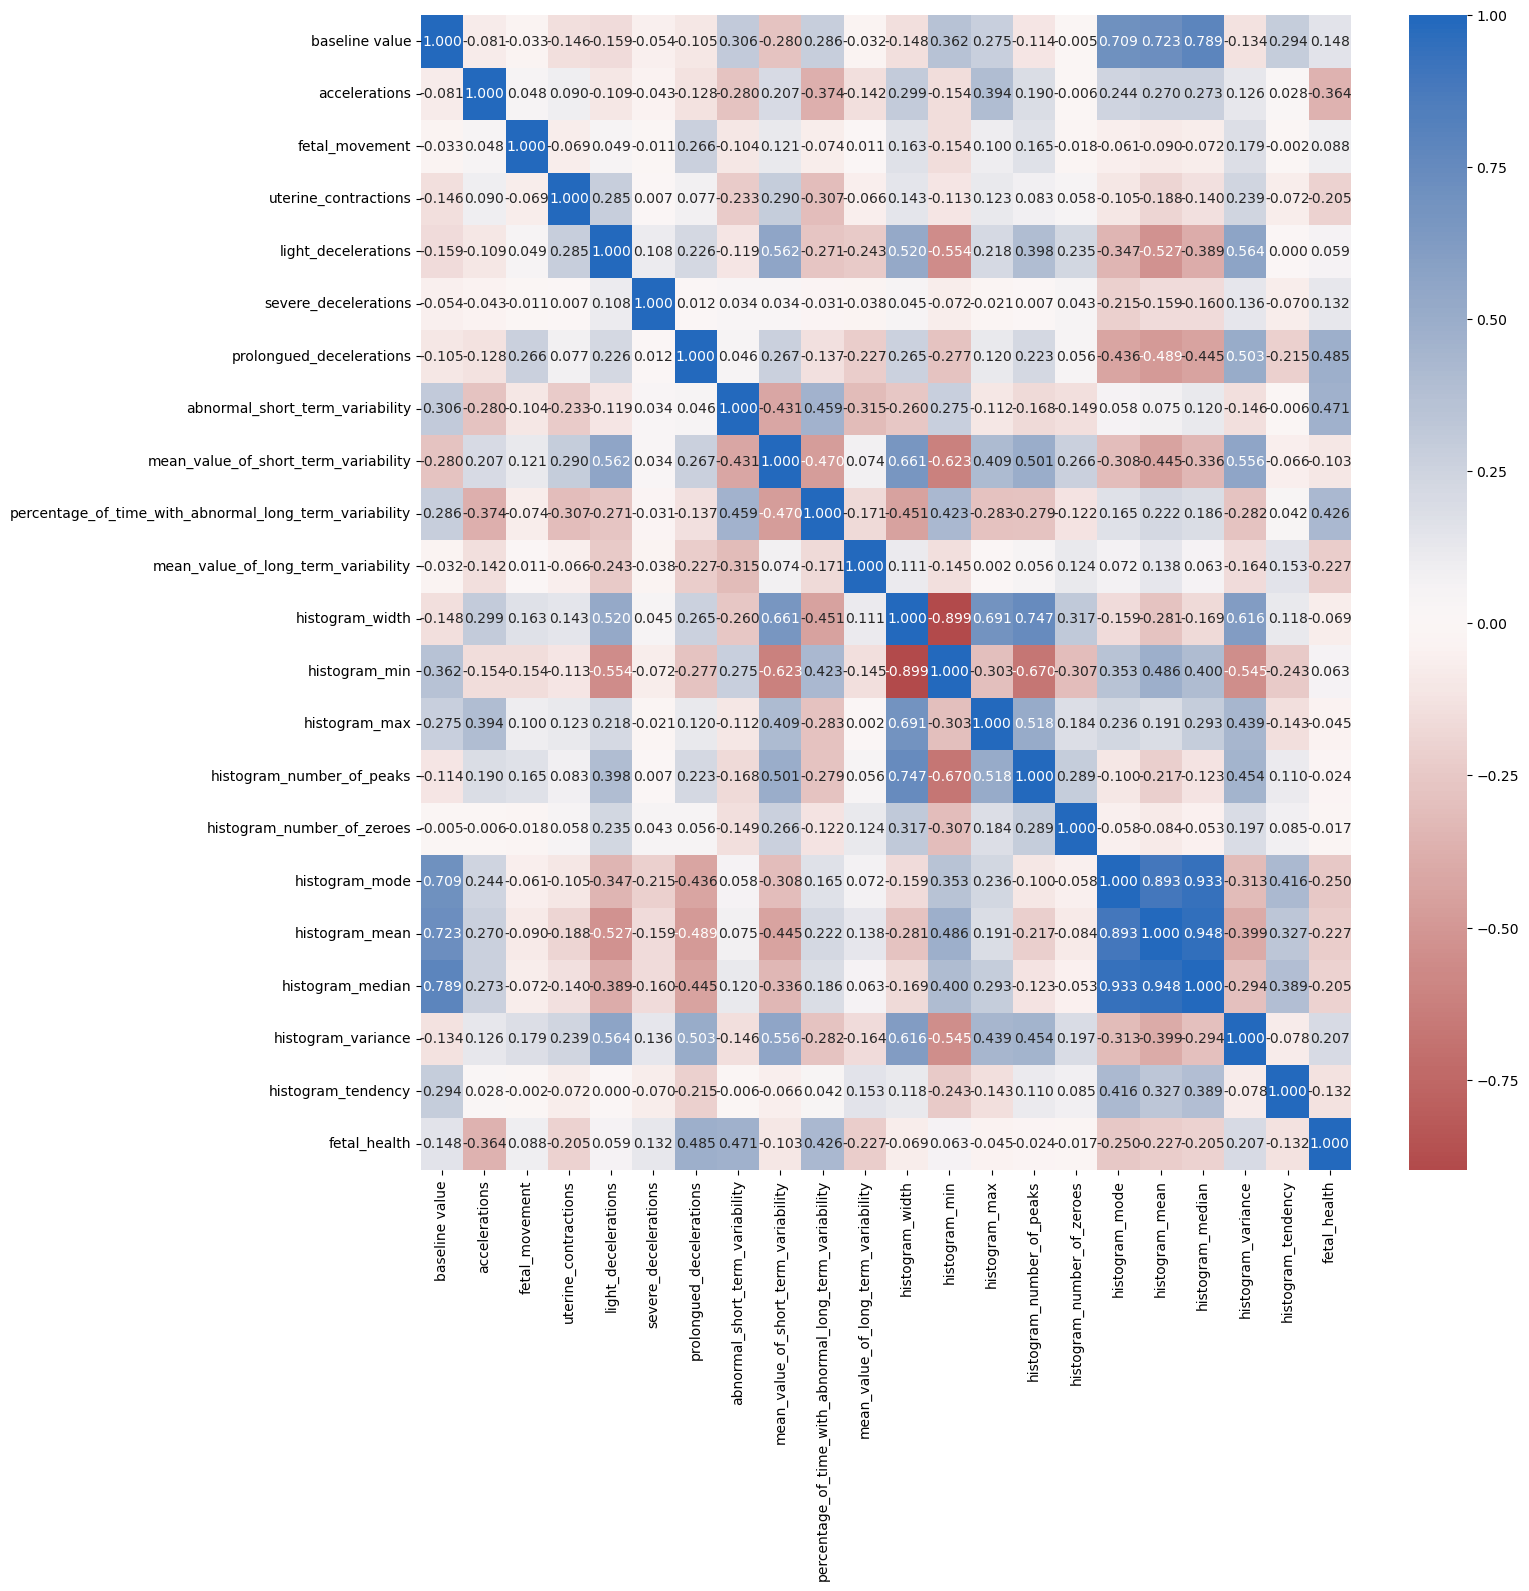

In [10]:
# Correlation
plt.figure(figsize = [15, 15])
sns.heatmap(fh_data.corr(method = 'pearson'), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

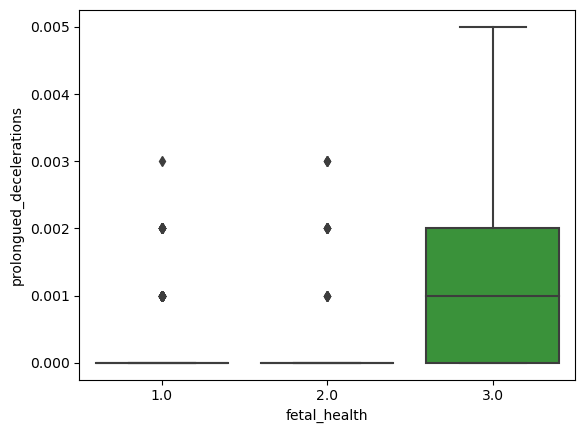

In [11]:
sns.boxplot(data = fh_data, x = 'fetal_health', y = 'prolongued_decelerations')

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

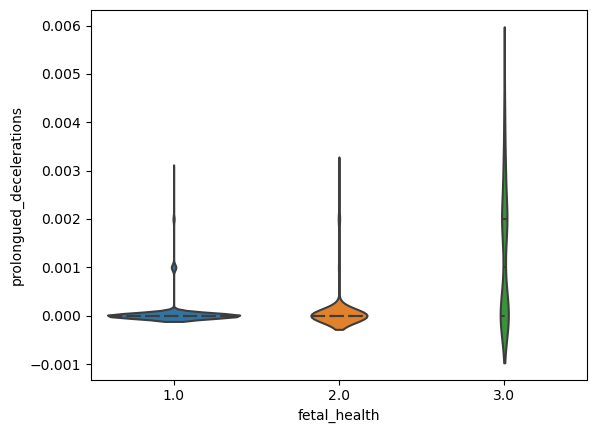

In [12]:
sns.violinplot(data = fh_data, x = 'fetal_health', y = 'prolongued_decelerations', inner = 'quartile')

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

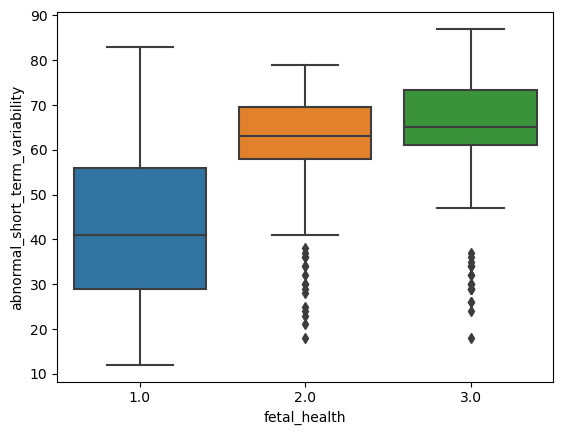

In [13]:
sns.boxplot(data = fh_data, x = 'fetal_health', y = 'abnormal_short_term_variability')

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

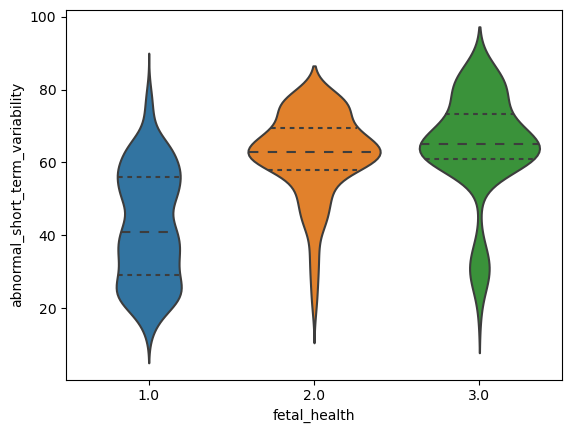

In [14]:
sns.violinplot(data = fh_data, x = 'fetal_health', y = 'abnormal_short_term_variability', inner = 'quartile')

<AxesSubplot:xlabel='fetal_health', ylabel='percentage_of_time_with_abnormal_long_term_variability'>

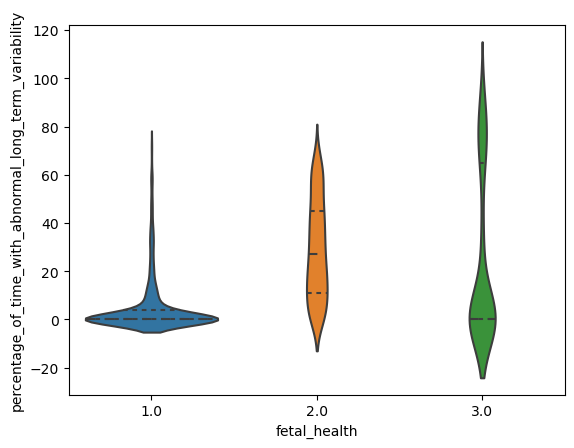

In [15]:
sns.violinplot(data = fh_data, x = 'fetal_health', y = 'percentage_of_time_with_abnormal_long_term_variability', inner = 'quartile')

#### Multivariate Analysis

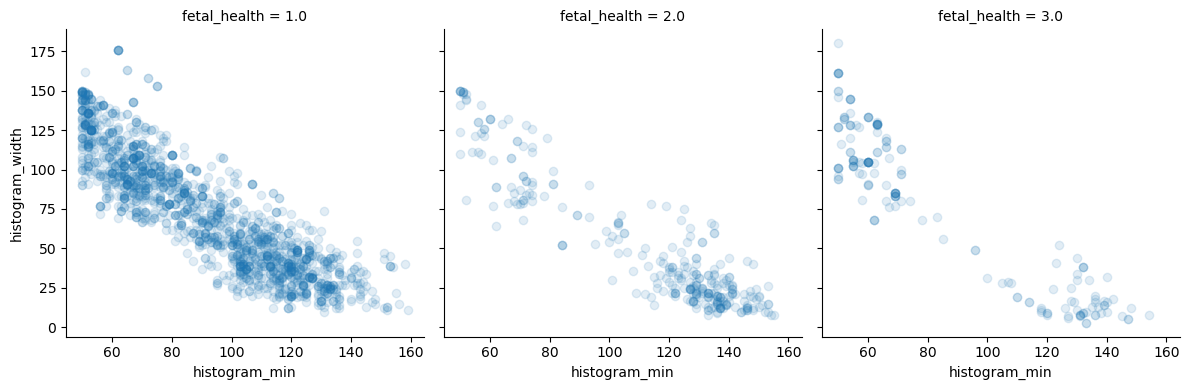

In [16]:
# Plot 1: Plotting the homework study time vs. the total score based on the number of cellphones

g = sns.FacetGrid(data = fh_data, col = 'fetal_health', height = 4)
g.map(plt.scatter, 'histogram_min', 'histogram_width', alpha = 1/8);

#### Data Cleaning

In [17]:
# Making a copy of the original dataset
original_fh_data = fh_data.copy()

In [18]:
fh_data.fetal_health.unique()

array([2., 1., 3.])

In [19]:
fetal_health_classes = [1,2,3]
fh_classes = pd.api.types.CategoricalDtype(ordered = True, categories = fetal_health_classes)
fh_data['fetal_health'] = fh_data['fetal_health'].astype(fh_classes)

In [20]:
fh_data.fetal_health.dtype

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [21]:
fh_data.histogram_tendency.unique()

array([ 1.,  0., -1.])

In [22]:
hist_tend_classes = [-1,0,1]
ht_classes = pd.api.types.CategoricalDtype(ordered = True, categories = hist_tend_classes)
fh_data['histogram_tendency'] = fh_data['histogram_tendency'].astype(ht_classes)

In [23]:
fh_data.histogram_tendency.unique()

[1, 0, -1]
Categories (3, int64): [-1 < 0 < 1]

### Task 2

#### Pandas Profiling

In [24]:
# Creating the pandas_profiling report for Fetal Health Data named profile
profile = ProfileReport(fh_data, title="Fetal Health Data Pandas Profiling Report", explorative = True)

In [26]:
# As the pdf export is not supported, the pandas_profiling report will be saved as an html
profile.to_file("Fetal_Health_Data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 1.08 PiB for an array with shape (1215352422900000,) and data type int8

In [ ]:
profile.to_notebook_iframe()

### Task 3

#### Applying Transformations